### **Run this code below to load modules and data necessary for the exercise or activity that follow**

In [2]:
# Import necessary modules and prepare the data

%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
from google.colab import files
uploaded = files.upload()
import io
rawBostonData = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))
rawBostonData = rawBostonData.dropna()
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10 
test_data_size = 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

Saving Boston.csv to Boston.csv


### **Exercise 2.02: Graphical investigation of linear relationships using Python**





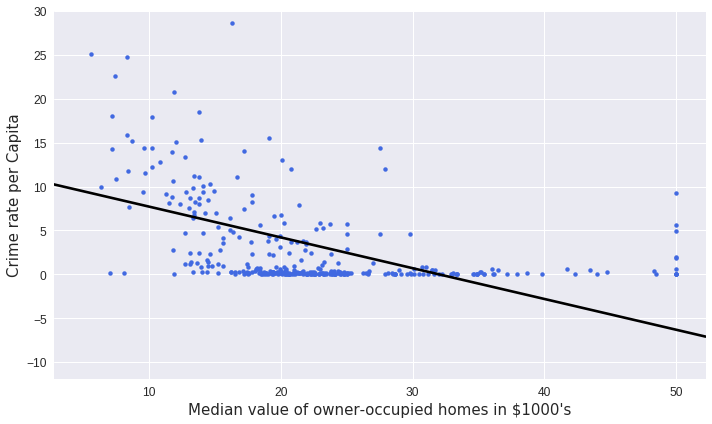

In [3]:
# Use the seaborn function regplot to create a scatter plot and fit a regression line through it

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=None,
data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color":\
"royalblue", "alpha":1})
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's",\
fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

### **Exercise 2.03: Examining a possible log-linear relationship using Python**

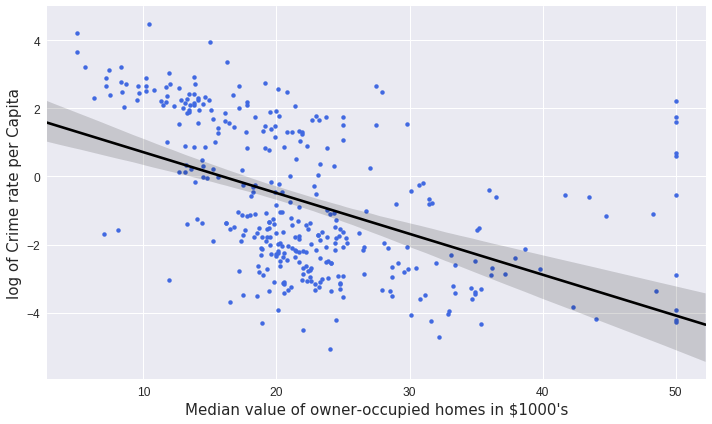

In [4]:
# Use the seaborn function regplot to create a log-linear plot and fit a regression line through it

fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax,\
color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15,\
fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's",\
fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

### **Exercise 2.04: Fit a simple linear regression model using the Statsmodels formula API**

In [5]:
# Use the statsmodels API to create a simple linear regression

linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks',\
data=train_data)
linearModelResult = linearModel.fit()
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.56e-13
Time:                        07:47:41   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

### **Activity 2.01: Fit a log-linear model using the Statsmodels formula API**

In [6]:
# Use the statsmodels API to create a log-linear regression model

logLinearModel = smf.ols(formula='np.log(crimeRatePerCapita) ~ medianValue_Ks',\
data=train_data)
logLinearModResult = logLinearModel.fit()
print(logLinearModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.238
Model:                                    OLS   Adj. R-squared:                  0.236
Method:                         Least Squares   F-statistic:                     109.9
Date:                        Wed, 04 Dec 2019   Prob (F-statistic):           1.48e-22
Time:                                07:47:46   Log-Likelihood:                -727.67
No. Observations:                         354   AIC:                             1459.
Df Residuals:                             352   BIC:                             1467.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

### **Exercise 2.05: Fit a multiple linear regression model using the Statsmodels formula API**

In [7]:
# Use the statsmodels API to create a multiple linear regression model

multiLinearModel = smf.ols(formula=\
'crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess +\
medianValue_Ks + nitrixOxide_pp10m', data=train_data)
multiLinearModResult = multiLinearModel.fit()
print(multiLinearModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.19e-37
Time:                        07:47:51   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 

### **Activity 2.02: Fit a multiple log-linear regression model**

In [8]:
# Use the statsmodels API to create a multiple log-linear regression model

multiLogLinMod = smf.ols(formula=\
'np.log(crimeRatePerCapita) ~ \
(pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m)**2',\
data=train_data)
multiLogLinModResult = multiLogLinMod.fit()
print(multiLogLinModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.884
Model:                                    OLS   Adj. R-squared:                  0.881
Method:                         Least Squares   F-statistic:                     261.5
Date:                        Wed, 04 Dec 2019   Prob (F-statistic):          7.79e-154
Time:                                07:47:57   Log-Likelihood:                -394.39
No. Observations:                         354   AIC:                             810.8
Df Residuals:                             343   BIC:                             853.3
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------